In [ ]:
#!pip install tensorflow
import tensorflow as tf
import numpy as np
from keras.callbacks import LambdaCallback

In [ ]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{0:6.1f} °C = {0:6.1f} °F".format(c, fahrenheit_a[i]))

 -40.0 °C =  -40.0 °F
 -10.0 °C =  -10.0 °F
   0.0 °C =    0.0 °F
   8.0 °C =    8.0 °F
  15.0 °C =   15.0 °F
  22.0 °C =   22.0 °F
  38.0 °C =   38.0 °F


In [ ]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1]) #Create the model

In [ ]:
model = tf.keras.Sequential([l0]) #Assemble layers in the model

In [ ]:
print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: print(model.layers[0].get_weights()))

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1)) #Compile the model, with loss and optimizer functions. Adam(learning rate) between 0.1 and 0.001

In [ ]:
history = model.fit(celsius_q, fahrenheit_a, epochs=1000, verbose=False) #Train the model
print("Finished training the model")

Finished training the model


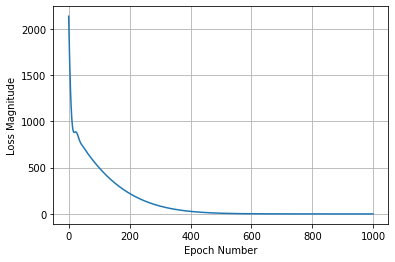

In [ ]:
import matplotlib.pyplot as plt #Display training statistics
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.grid()

In [ ]:
print(model.predict([0,50,100])) #Use the model to predict values

1/1 [==============================] - 0s 57ms/step
[[ 31.927177]
 [121.8354  ]
 [211.74362 ]]


In [ ]:
print("These are the layer variables: {}".format(l0.get_weights())) #internal variables of the Dense layer (esperado: 1.8*C+32)

These are the layer variables: [array([[1.7981645]], dtype=float32), array([31.927177], dtype=float32)]


In [ ]:
w, b = model.weights
print("Weights: \n {} \n Bias: \n {}".format(w,b))

Weights: 
 <tf.Variable 'dense_4/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.7981645]], dtype=float32)> 
 Bias: 
 <tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32, numpy=array([31.927177], dtype=float32)>
